# PREPROCESSING (Part1)

# Data checking

## Get familiar with your data

Before doing any calculation, just have a look at your data. Even with cured data sets, the answer to one or more of the following questions could be "yes":
- Is there anything wrong with the data?
- Are there any quirks with the data?
- Do I need to fix or remove any of the data?

Let's read some data!

http://pandas.pydata.org/pandas-docs/stable/

In [1]:
import pandas as pd

init_data = pd.read_csv('data/init_data.csv')
init_data

,v1,v2,v3,v4,v5,v6,v7,c
0,7.7,2.8,6.7,2.0,5,-7.7,4.5,3
1,6.0,2.2,4.0,1.0,5,-6.0,3.5,2
2,6.6,3.0,4.4,1.4,5,-6.6,3.9,2
3,6.7,3.3,5.7,2.1,5,-6.7,4.6,3
4,4.9,3.1,1.5,0.1,5,-4.9,2.6,1
...,...,...,...,...,...,...,...,...
145,5.7,2.5,5.0,2.0,5,-5.7,4.5,3
146,5.8,2.7,3.9,1.2,5,-5.8,3.7,2
147,6.4,3.2,4.5,1.5,5,-6.4,4.0,2
148,7.2,3.6,6.1,2.5,5,-7.2,5.0,3


By visual inspection (we see the first 5 and the last 5), we can detect some possible quirks:

- v5 seems to be constant
- v6 seems to be -v1

We can try to confirm the suspicions.

In [2]:
init_data.describe()

,v1,v2,v3,v4,v5,v6,v7,c
count,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,5.0,-5.843333,3.698667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.0,0.828066,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,5.0,-7.900000,2.600000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,5.0,-6.400000,2.800000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,5.0,-5.800000,3.800000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,5.0,-5.100000,4.300000,3.000000
max,7.900000,4.400000,6.900000,2.500000,5.0,-4.300000,5.000000,3.000000


Indeed
- v5 has null std, thus constant. We remove it.
- v6 and v1 have opposite mean, the same std, and opposite-crossed min, max and quartiles. We check whether v6 is equal to -v1. If so, we remove v6.

In [3]:
list(init_data.v6.values) == list(init_data.v1.values * (-1))

True

In [4]:
init_data.drop('v5', axis=1, inplace=True)
init_data.drop('v6', axis=1, inplace=True)

Something else? What about v4 and v7? 
A picture is worth a thousand words

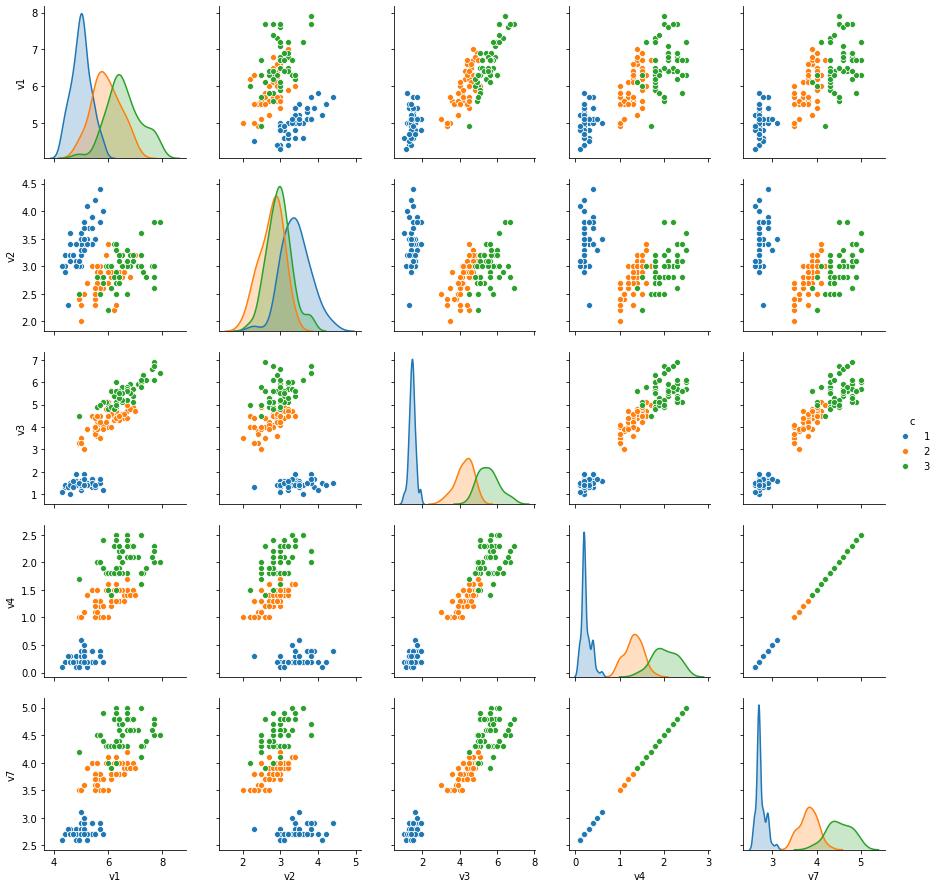

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(init_data, hue='c', vars=['v1', 'v2', 'v3', 'v4', 'v7'], height=2.5, palette=None);
plt.show()

The relationship with v1, v2, and v3 of both v4 and v7 is the same, but for the scale.

It seems that v7 is equal to v4+2.5. Let's check it

In [6]:
list(init_data.v7.values) == list(init_data.v4.values + 2.5)

True

We remove v7.

In [7]:
init_data.drop('v7', axis=1, inplace=True)

Our data set, as it is now, is a famous data set used by Fisher in 1936, called Iris.
The variables v1 to v4 correspond to measurements of sepal length, sepal width, petal length, and petal width of three species of Iris plants (Iris Setosa, Iris Versicolor, and Iris Virginica; corresponding to 1, 2 and 3 in our variable c).

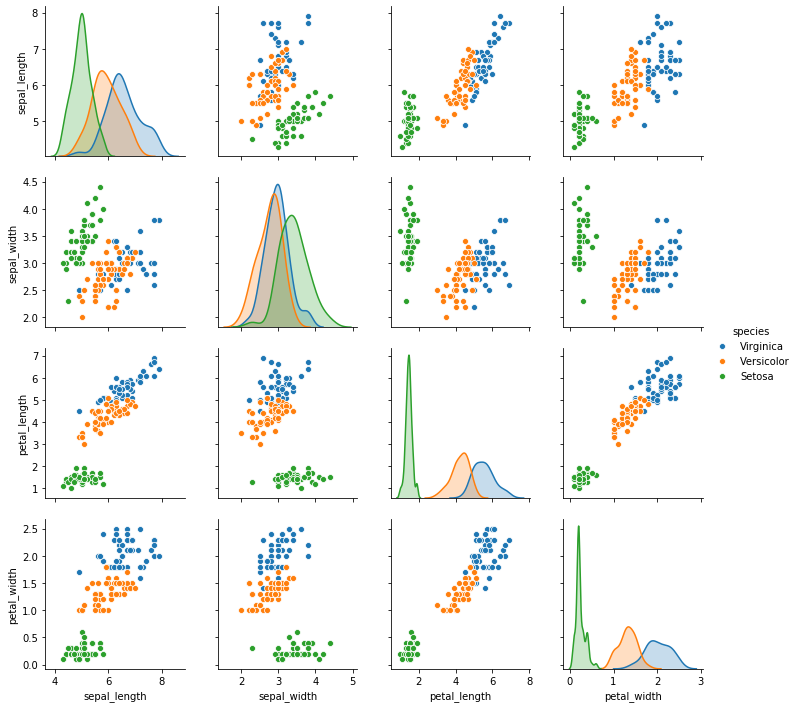

In [8]:
iris = init_data
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.species.replace([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'], inplace=True)
sns.pairplot(iris, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], height=2.5, palette=None);
plt.show()

This data is coceived for trying to determine the species of an Iris plant, using the four measurements. Therefore, it is a classification problem with three classes, corresponding to the three species.

It seems that Setosa is separable from the rest just by looking at petal lengths or widths.

Nevertheless, it does not seem obvious for Versicolor and Virginica.

## Missing values and outliers

Now, we will have a look at outliers and missing values. We consider the following (naïve) approaches:
- Outliers: Remove rows containing outliers. We will consider both individual and colective  outlier detections.
- Missing values (nan): Imputation using the mean value, or row removal. "nan" stands for "not a number".

**Question 1:**
- Outliers + nan? => Removing a row because of an outlier affects the mean of all columns, not only the one containing it, for the subsequent nan treatment. We assume that nan are ignored in the mean and std initial calculation.
- nan + outliers? => The imputation using the mean does not affect the posterior mean, but affects the std.

Which one would you perform first?

#### Answer:
DEPENDE.
En mi opinión primero trataría los outliers. Tener outilers no significa que hay que borrarlos todos.
- Hay que entender el origen de los ouliers y lo que representan. 
- Hay que borrar los outliers solo los que pensamos que son a causa de un error.
- Una vez entendidos los outliers, se pueden empezar a tratar los valores faltantes.
    - Si empezamos a tratar antes los valores faltantes que los outliers, podemos estar usando valores que son causados por un error para completar los valores faltantes.

Let's see what happens in our Iris data in both outliers and missing values treatments separately.

### Missing values

We have artificially introduced some nan in petal length and petal width.

In [ ]:
nan_data = pd.read_csv('nan_data.csv')
nan_data.species.replace(['Setosa', 'Versicolor', 'Virginica'], [1, 2, 3], inplace=True)
nan_data.describe()

In the count for petal length and width we can see that there are 7 nan in petal length and 6 nan in petal width. 

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
nan_imputed_data = pd.DataFrame(data=imp.fit_transform(nan_data))
nan_imputed_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
nan_imputed_data.describe()

Let's see how the plots look now!

In [ ]:
nan_imputed_data.species.replace([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'], inplace=True)
sns.pairplot(nan_imputed_data, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], height=2.5);
plt.show()

No obvious separation is possible anymore.

What if we had just ignored those rows?

**Question 2:**
How many rows will remain after the deletion?

#### Answer:
- En petal_length, hay 7 valores faltantes.
- En petal_width, hay 6 valores faltantes.
- Como mínimo quitaremos 7 filas y como maximo 13 (7+6) filas. Depende, puede que en una fila haya más de un missing value.

In [ ]:
nan_removed_data = nan_data
nan_removed_data.dropna(axis=0, how='any', inplace=True)

Let's see whether you were right or not.

In [ ]:
nan_removed_data.describe()

**Question 2b:** Were you right? What is the reason for that failure/success?

#### Answer:
- Si, se han borrado 12 filas.
- Como hay 7 valores faltantes en petal_length y 6 en petal_width, como mínimo se quitarán 7 filas y como maximo 13 (7+6) filas.

In [ ]:
nan_removed_data.species.replace([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'], inplace=True)
sns.pairplot(nan_removed_data, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], height=2.5);
plt.show()

As the nan have been artificially introduced by us, we will not further use nan_removed_data.

### Outliers

#### Colectively

We first check colectively, using Mahalanobis distance.

In [ ]:
import sklearn
from sklearn.covariance import EllipticEnvelope
outlier_data = pd.read_csv('iris_data.csv')
outlier_data.species.replace(['Setosa', 'Versicolor', 'Virginica'], [1, 2, 3], inplace=True)
elip_env = sklearn.covariance.EllipticEnvelope().fit(outlier_data)
detection = elip_env.predict(outlier_data)
outlier_positions_mah = [x for x in range(outlier_data.shape[0]) if detection[x] == -1]
if detection is []:
    print("There are not outliers in the data.")
else:
    print("The " + str(len(outlier_positions_mah)) + " outliers found are in positions:\n" + str(outlier_positions_mah))
    classes_names = ['Setosa', 'Versicolor', 'Virginica']
    print("They correspond respectively to classes:\n" +
          str([classes_names[x-1] for x in outlier_data.species.values[outlier_positions_mah]])) 

Graphically,

In [ ]:
outlier_data.species.values[outlier_positions_mah] += 3
outlier_data.species.replace([1, 2, 3, 4, 5, 6], 
                             ['Setosa', 'Versicolor', 'Virginica', 'Outliers Setosa',
                              'Outliers Versicolor', 'Outliers Virginica'], inplace=True)
sns.pairplot(outlier_data, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], height=2.5);
plt.show()

It seems that there is not a single variable contributing alone to the colective assertion as outliers of those 15 rows.

**Question3:** Then, why are there outliers? Hint: Think on the shape of an ellipsoid.

#### Answer:
- Cuando metemos un elipsoide en una caja, toca en un punto en cada pared de la caja. 
- Dentro de la caja quedan espacios vacios fuera del elipsoide. 
- Los outliers quedarian dentro de la caja pero fuera del elipsoide.

#### Individually

Now we check individualy, i.e. variable by variable. We opt for the robust option based on boxplots, i.e.
$$x \in X \:\: outlier \:\:\Leftrightarrow \:\: x\notin \left[Q_1 - 1.5 * IQR, Q_3 + 1.5 * IQR\right]$$


In [ ]:
outlier_data = pd.read_csv('iris_data.csv')
outlier_data.species.replace(['Setosa', 'Versicolor', 'Virginica'], [1, 2, 3], inplace=True)
ax = sns.boxplot(data=outlier_data[outlier_data.columns[:-1]], orient="h", palette="Set2", linewidth=2.5)
plt.show()

Closer look to sepal width:

In [ ]:
ax2 = sns.boxplot(y="sepal_width", data=outlier_data, orient="h", color=sns.color_palette("Set2")[1], linewidth=2.5)
plt.show()

We find them:

In [ ]:
IQR = outlier_data.describe()["sepal_width"]["75%"] - outlier_data.describe()["sepal_width"]["25%"]
whiskers = [outlier_data.describe()["sepal_width"]["25%"] - (1.5 * IQR), outlier_data.describe()["sepal_width"]["75%"] + (1.5 * IQR)]
outlier_positions_box = [x for x in range(outlier_data.shape[0]) if outlier_data.sepal_width.values[x] < whiskers[0] or outlier_data.sepal_width.values[x] > whiskers[1]]
print("The outliers found are in positions:\n" + str(outlier_positions_box))
print("They correspond respectively to sepal widths:\n" + str(outlier_data.sepal_width.values[outlier_positions_box]))
classes_names = ['Setosa', 'Versicolor', 'Virginica']
print("They correspond respectively to classes:\n" + str([classes_names[x-1] for x in outlier_data.species.values[outlier_positions_box]])) 

Graphically,

In [ ]:
outlier_data.species.values[outlier_positions_box] += 3
outlier_data.species.replace([1, 2, 3, 4, 5, 6], ['Setosa', 'Versicolor', 'Virginica', 'Outliers Setosa', 'Outliers Versicolor', 'Outliers Virginica'], inplace=True)
sns.pairplot(outlier_data, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], height=2.5);
plt.show()

**Question 4:** Which outlier treatment order would you choose?:
- First individual, then colective? => Then the ellipsoid for collective changes after individual.
- First colective, then individual? => Then the boxplots change after collective.
- Both in parallel? => Then present outliers affect both the ellipsoid and the boxplots.

Why?

#### Answer:
Depende. No hay una solución concreta. Todos tienen sus incovenientes.
- Localizar por separado no perturba el modelo pero puede ser bueno o no.
- Si calculas los individuales primero, la forma del elipsoide va a cambiar. 

We will do it here in parallel.

In [ ]:
import numpy as np
outlier_data.species.replace(['Setosa', 'Versicolor', 'Virginica', 'Outliers Setosa', 'Outliers Versicolor', 'Outliers Virginica'], [1, 2, 3, 1, 2, 3], inplace=True)
outlier_free_data = outlier_data
outlier_positions = list(np.sort(outlier_positions_mah + outlier_positions_box))
outlier_free_data.drop(outlier_free_data.index[outlier_positions], inplace=True)
outlier_free_data.describe()

Note: Now we should have guessed correctly that the number of rows to be kept would be 131 (i.e., deleting 19 = 15 + 4) because both types of outliers were from different classes.  

Graphically,

In [ ]:
outlier_free_data.species.replace([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'], inplace=True)
sns.pairplot(outlier_free_data, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], height=2.5);
plt.show()

Notice that now all three classes are almost already separated.

# Discretization

For applying the Fayyad-Irani MDLP discretization algorithm, there is not an implementation in any standard Python package. Therefore, we will opt for other alternatives.

Nevertheless, discretized datasets for both raw and clean data are available locally for loading in csv format.

Preprocessing is not a goal by itself. Its aim is to prepare the data for a posterior task (learning). The task we will choose is a decision tree.

In [ ]:
from IPython.core.display import Image, display
print("Some data")
display(Image(filename='DecisionTreeSampleData.png'))

print("Decision tree levels")
display(Image(filename='DecisionTreeLevels.png'))

In the first level (left picture) we see the cutpoint in the value $y = 6$, dividing the space into two hemispheres. Notice that in the upper half all points are from the same class, thus this part of the space will not be further divided.

In the second level (middle picture), once divided the space in the previous step and fixed the upper hemisphere , we devide the lower one into two hemispheres using the cutpoint $x = -0.5$

In the third level (right picture), both parts will be split into two because the previous division could not isolate points from one unique class. The new cutpoints are now $y = 4$ (left part) and $y = 2.5$ (right part). The process continues until complete class isolation. 

We will compare the performance of our eight Iris datasets:
- Raw data (provided file iris_data.csv),
- Raw MDLP discretized data (provided file iris_MDLP_data.csv),
- Raw equal-width discretized data,
- Raw equal-frequency discretized data,
- Cleaned data (provided file iris_clean_data.csv),
- Cleaned MDLP discretized data (provided file iris_MDLP_clean_data.csv),
- Cleaned equal-width discretized data, and
- Cleaned equal-frequency discretized data.

We will use decision tree as model and F1 score as validation metric

The function automatic_score computes the average F1 score of the 5 steps in 5-Fold CV, using decision tree as estimator

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


def automatic_scoring(df):
    algorithm = DecisionTreeClassifier()
    score = cross_val_score(estimator=algorithm, X=df.values[:, :-1], y=df.values[:, -1], cv=5, scoring='f1_macro')
    summary_score = score.mean()
    return summary_score


As an example, we calculate the score for the cleaned data case:

In [ ]:
clean_data = pd.read_csv('iris_clean_data.csv')
clean_data_score = automatic_scoring(clean_data)
clean_data_score

#### Exercise 1:
Obtain the 4 not provided datasets. Obtain the score for the 8 datasets using automatic_scoring function. Which preprocessing scheme performs better?

Hint: Remember that the Scikit-Learn function needed is KBinsDiscretizer. Execute next cell for further info.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
?KBinsDiscretizer

Reminder: Take into account the difference between a Pandas dataframe and a Numpy array.

#### Solution:

In [ ]:
# Your solution here

# In general, and for your future revisions of the material, it is better that you provided a complete code here.
# So it is better to define imports and functions here, so that this one single cell could be executed on its own.

# Feature extraction

We will explore principal component analysis (PCA). We will see how many principal components (PCs) are selected when we want to capture at least 99% of the total variance, as well as the linear combinations defining them. We do not need to perform mean centering because PCA from Scikit-Learn does it internally.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)

First with raw data:

In [ ]:
raw_data = pd.read_csv('iris_data.csv')
raw_data.species.replace(['Setosa', 'Versicolor', 'Virginica'], [1, 2, 3], inplace=True)
X_raw = raw_data[raw_data.columns[:-1]]
pca.fit(X_raw)
X_reduced_raw = pca.transform(X_raw)
raw_pca_data = pd.DataFrame(data=X_reduced_raw, columns=['PC1', 'PC2', 'PC3'])
# NOTE: The names of the columns were given knowing that the amount of selected PCs was going to be 3
# In the next piece of code we generalize it using a list comprehension
raw_pca_data = pd.concat([raw_pca_data, raw_data[raw_data.columns[-1]]], axis=1)
print("There have been selected " + str(X_reduced_raw.shape[1]) + " principal components.")
print("Meaning of the " + str(X_reduced_raw.shape[1]) + " components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, ["sepal_length", "sepal_width", "petal_length", "petal_width"])))

Now with clean data

In [ ]:
clean_data = pd.read_csv('iris_clean_data.csv')
clean_data.species.replace(['Setosa', 'Versicolor', 'Virginica'], [1, 2, 3], inplace=True)
X_clean = clean_data[clean_data.columns[:-1]]
pca.fit(X_clean)
X_reduced_clean = pca.transform(X_clean)
clean_pca_data = pd.DataFrame(data=X_reduced_clean, columns=['PC' + str(x) for x in list(range(1, X_reduced_clean.shape[1] + 1))])
clean_pca_data = pd.concat([clean_pca_data, clean_data[clean_data.columns[-1]]], axis=1)
print("There have been selected " + str(X_reduced_clean.shape[1]) + " principal components.")
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, ["sepal_length", "sepal_width", "petal_length", "petal_width"])))

Let's compare the first two PCs by means of scatter plots

In [ ]:
# NOTE: This 2-D plot with the first two PCs would rise an error if the amount of selected PCs were 1 (e.g. if PCA(n_components=0.90))
fig, (ax1, ax2) = plt.subplots(figsize=(16, 6), ncols=2)
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.3)
y_raw = raw_data.species.values
y_clean = clean_data.species.values
ax1.scatter(X_reduced_raw[:, 0], X_reduced_raw[:, 1], c=y_raw, alpha = 1.0)
ax1.set_title('Raw data')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax2.scatter(X_reduced_clean[:, 0], X_reduced_clean[:, 1], c=y_clean, alpha = 1.0)
ax2.set_title('Clean data')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
plt.show()

We can expect better performance with the clean data, at least for low depth levels. We will check it.

#### Exercise 2: 
Get the proyected data (both raw and clean) capturing 95% of the variance, and calculate the performance of both using the same modeling scheme used before (5-Fold CV with desision trees by meand of F1 score).

Is the performance better in the case of clean data?

Is the performance better with PCA projections (so using less than 4 extracted variables) than with the initial data (4 original variables)?

#### Solution:

In [ ]:
# Your solution here

# In general, and for your future revisions of the material, it is better that you provided a complete code here.
# So it is better to define imports and functions here, so that this one single cell could be executed on its own.

### Comparison with feature selections

As we have 4 features, there are only 6 posible subsets of size 2. We consider all 6 2-features subsets, focusing only in the clean data.

**Question 5:** [Note: to be answered without any code (just feelings. There are not right or wrong answers)] 
- Which pair do you think will work the best? Better than PCs? Better than the original 4-features data? Why?
- Which do you think it is the (theoretical) advantage of using 2PCs instead of 2 original variables?

Note: every answer we provide using a model (decision trees here) is valid in that environment. A different model could provide a different answer.

#### Answers:

[Your answers here]

#### Exercise 3: 
Focusing only in clean data, obtain a vector containing the 6 score values for the 6 possible 2-features subsets.
For the selected modeling scheme, which preprocessing scheme seemed to be the best? 

Note: Try to code the first part of the solution in an efficient way. 

#### Solution:

In [ ]:
# Your solution here

# In general, and for your future revisions of the material, it is better that you provided a complete code here.
# So it is better to define imports and functions here, so that this one single cell could be executed on its own.